In [1]:
#Import the packages
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from scipy.stats import mannwhitneyu
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#Load the dataset
data = "E:\\DATASCIENCE\\project\\echocardiogram.csv"
df = pd.read_csv(data, header=None, delimiter=',')

# Get an overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       133 non-null    object
 1   1       131 non-null    object
 2   2       132 non-null    object
 3   3       127 non-null    object
 4   4       133 non-null    object
 5   5       125 non-null    object
 6   6       118 non-null    object
 7   7       122 non-null    object
 8   8       129 non-null    object
 9   9       131 non-null    object
 10  10      76 non-null     object
dtypes: object(11)
memory usage: 11.6+ KB
None


In [3]:
#Display the first 5 rows
print(df.head())

           0         1            2                    3   \
0  patient_id  survival  still-alive  age-at-heart-attack   
1           1        11            0                   71   
2           2        19            0                   72   
3           3        16            0                   55   
4           4        57            0                   60   

                     4                      5       6      7   \
0  pericardial-effusion  fractional-shortening    epss   lvdd   
1                     0                   0.26       9    4.6   
2                     0                   0.38       6    4.1   
3                     0                   0.26       4   3.42   
4                     0                  0.253  12.062  4.603   

                  8                  9           10  
0  wall-motion-score  wall-motion-index  alive-at-1  
1                 14                  1           0  
2                 14                1.7           0  
3                 14      

In [4]:
#Display the last 5 rows
print(df.tail())

      0    1  2   3  4     5     6     7     8      9    10
128  128  7.5  1  64  0  0.24  12.9  4.72    12      1  NaN
129  129   41  0  64  0  0.28   5.4  5.47    11    1.1  NaN
130  130   36  0  69  0   0.2     7  5.05  14.5   1.21  NaN
131  131   22  0  57  0  0.14  16.1  4.36    15   1.36  NaN
132  132   20  0  62  0  0.15     0  4.51  15.5  1.409  NaN


In [9]:
# Print the data types of each column
print(df.dtypes)
# Sample 10 random rows from the dataframe
print(df.sample(10))

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
dtype: object
        0     1    2     3    4      5     6     7      8     9         10
104  104.0  25.0  0.0  62.0  0.0  0.258  11.8  4.87  11.00  1.00  0.346667
56    56.0  10.0  0.0  66.0  0.0  0.290  15.6  6.15  14.00  1.00  0.000000
10    10.0  25.0  0.0  54.0  0.0  0.140  13.0  4.49  15.50  1.19  0.000000
14    14.0  44.0  0.0  60.0  0.0  0.150  10.0  3.73  14.00  1.00  0.000000
112  112.0  13.0  0.0  66.0  0.0  0.240  13.6  4.38  22.00  2.20  0.346667
94    94.0  33.0  0.0  46.0  0.0  0.272  16.5  5.36  12.67  1.06  0.346667
5      5.0  19.0  1.0  57.0  0.0  0.160  22.0  5.75  18.00  2.25  0.000000
9      9.0  19.0  0.0  46.0  0.0  0.340   0.0  5.09  16.00  1.14  0.000000
108  108.0  24.0  0.0  57.0  0.0  0.036   7.0  4.12  13.50  1.23  0.346667
113  113.0  36.0  0.0  61.0  0.0  0.270   9.0  4.06  12.00  1.00  0.346667


In [5]:
#  Missing Value Analysis
print("\nMissing Value Analysis:")
print(df.isnull().sum())


Missing Value Analysis:
0      0
1      2
2      1
3      6
4      0
5      8
6     15
7     11
8      4
9      2
10    57
dtype: int64


In [6]:
print(df.drop_duplicates(inplace=True))
print(df.shape)

None
(133, 11)


In [7]:
#converting to numeric and filling missing values with mean
df=df.apply(pd.to_numeric,errors='coerce')
df.fillna(df.mean(),inplace=True)
print(df)

        0          1         2          3         4         5          6   \
0     66.5  22.182923  0.328244  62.813722  0.765152  0.216734  12.164769   
1      1.0  11.000000  0.000000  71.000000  0.000000  0.260000   9.000000   
2      2.0  19.000000  0.000000  72.000000  0.000000  0.380000   6.000000   
3      3.0  16.000000  0.000000  55.000000  0.000000  0.260000   4.000000   
4      4.0  57.000000  0.000000  60.000000  0.000000  0.253000  12.062000   
..     ...        ...       ...        ...       ...       ...        ...   
128  128.0   7.500000  1.000000  64.000000  0.000000  0.240000  12.900000   
129  129.0  41.000000  0.000000  64.000000  0.000000  0.280000   5.400000   
130  130.0  36.000000  0.000000  69.000000  0.000000  0.200000   7.000000   
131  131.0  22.000000  0.000000  57.000000  0.000000  0.140000  16.100000   
132  132.0  20.000000  0.000000  62.000000  0.000000  0.150000   0.000000   

           7          8      9         10  
0    4.763157  14.438125  1.378

In [8]:
#outlier detection
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[~((df<lower_bound)|(df>upper_bound)).any(axis=1)]
print(df)
print(df.shape)

        0     1    2     3    4      5       6      7     8      9         10
1      1.0  11.0  0.0  71.0  0.0  0.260   9.000  4.600  14.0  1.000  0.000000
2      2.0  19.0  0.0  72.0  0.0  0.380   6.000  4.100  14.0  1.700  0.000000
3      3.0  16.0  0.0  55.0  0.0  0.260   4.000  3.420  14.0  1.000  0.000000
4      4.0  57.0  0.0  60.0  0.0  0.253  12.062  4.603  16.0  1.450  0.000000
5      5.0  19.0  1.0  57.0  0.0  0.160  22.000  5.750  18.0  2.250  0.000000
..     ...   ...  ...   ...  ...    ...     ...    ...   ...    ...       ...
128  128.0   7.5  1.0  64.0  0.0  0.240  12.900  4.720  12.0  1.000  0.346667
129  129.0  41.0  0.0  64.0  0.0  0.280   5.400  5.470  11.0  1.100  0.346667
130  130.0  36.0  0.0  69.0  0.0  0.200   7.000  5.050  14.5  1.210  0.346667
131  131.0  22.0  0.0  57.0  0.0  0.140  16.100  4.360  15.0  1.360  0.346667
132  132.0  20.0  0.0  62.0  0.0  0.150   0.000  4.510  15.5  1.409  0.346667

[77 rows x 11 columns]
(77, 11)


In [10]:
# Now, calculate the mean, median
print("mean=\n", df.mean())
print("median=\n", df.median())

mean=
 0     71.259740
1     27.506494
2      0.155844
3     62.109626
4      0.000000
5      0.218746
6     10.664096
7      4.637162
8     13.193198
9      1.199870
10     0.175584
dtype: float64
median=
 0     74.000000
1     27.000000
2      0.000000
3     62.000000
4      0.000000
5      0.217000
6     10.200000
7      4.560000
8     13.000000
9      1.080000
10     0.346667
dtype: float64


In [11]:
#to find mode
print("mode=\n", df.mode()[0])

mode=
 0       1.0
1       2.0
2       3.0
3       4.0
4       5.0
      ...  
72    128.0
73    129.0
74    130.0
75    131.0
76    132.0
Name: 0, Length: 77, dtype: float64


In [12]:
# Calculate the interquartile range (IQR) of a numerical column
iqr = df[4].quantile(0.75) - df[5].quantile(0.25)
print("Interquartile Range (IQR):", iqr)

#Calculate the quartiles of a numerical column
quartiles = df[6].quantile([0.25, 0.5, 0.75])
print("\nQuartiles:", quartiles)

# Calculate the percentiles of a numerical column
percentiles = np.percentile(df[2], [25, 50, 75])
print("\nPercentiles:", percentiles)

# Calculate the range of a numerical column
range_value = df[8].max() - df[7].min()
print("\nRange:", range_value)

Interquartile Range (IQR): -0.15

Quartiles: 0.25     6.6
0.50    10.2
0.75    13.2
Name: 6, dtype: float64

Percentiles: [0. 0. 0.]

Range: 18.9


In [13]:
# Variance for two columns
var1 = np.var(df[6], ddof=1)
var2 = np.var(df[7], ddof=1)

# F-test calculation
f_stat = var1 / var2
print("F-statistic:", f_stat)

# Calculate the standard deviation of a numerical column
std_deviation = df[5].std()
print("\nStandard Deviation:", std_deviation)

# oneway anova
f_stat, p_value = f_oneway(df[0], df[1], df[2])
print("\nANOVA F-statistic:", f_stat)
print("\nP-value:", p_value)
print("\nColumn names:", df.columns)

F-statistic: 70.59571471641907

Standard Deviation: 0.08688742838156488

ANOVA F-statistic: 167.20729743435518

P-value: 1.986653744607111e-45

Column names: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')


In [14]:
# Calculate the coefficient of variation (CV) of a numerical column
cv = (df[6].std() / df[6].mean()) * 100
print("Coefficient of Variation (CV):", cv)
# Calculate the covariance between two numerical columns
covariance = np.cov(df[5], df[1])
print("\nCovariance:", covariance)

Coefficient of Variation (CV): 52.65579712476295

Covariance: [[7.54942521e-03 2.87666222e-01]
 [2.87666222e-01 1.95304234e+02]]


In [15]:
#Calculate the z-scores of a numerical column
z_scores = stats.zscore(df[1])
print("Z-scores:", z_scores)

Z-scores: 1     -1.188879
2     -0.612679
3     -0.828754
4      2.124267
5     -0.612679
         ...   
128   -1.440966
129    0.971869
130    0.611744
131   -0.396605
132   -0.540655
Name: 1, Length: 77, dtype: float64


In [16]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
               0          1          2          3     4          5   \
count   77.000000  77.000000  77.000000  77.000000  77.0  77.000000   
mean    71.259740  27.506494   0.155844  62.109626   0.0   0.218746   
std     39.770527  13.975129   0.365086   7.500054   0.0   0.086887   
min      1.000000   0.250000   0.000000  46.000000   0.0   0.030000   
25%     41.000000  19.000000   0.000000  57.000000   0.0   0.150000   
50%     74.000000  27.000000   0.000000  62.000000   0.0   0.217000   
75%    104.000000  36.000000   0.000000  66.000000   0.0   0.280000   
max    132.000000  57.000000   1.000000  80.000000   0.0   0.410000   

              6          7          8          9          10  
count  77.000000  77.000000  77.000000  77.000000  77.000000  
mean   10.664096   4.637162  13.193198   1.199870   0.175584  
std     5.615265   0.668315   2.720168   0.277086   0.174455  
min     0.000000   3.100000   8.000000   1.000000   0.000000  
25%     6.600000   4

In [17]:
# Skewness and Kurtosis
print("\nSkewness:")
print(df.skew())
print("\nKurtosis:")
print(df.kurt())


Skewness:
0    -0.233615
1    -0.065587
2     1.935617
3     0.256467
4     0.000000
5     0.056849
6     0.371208
7     0.272742
8     0.786925
9     1.967457
10   -0.026495
dtype: float64

Kurtosis:
0    -1.091267
1    -0.416950
2     1.792505
3     0.169199
4     0.000000
5    -0.391444
6     0.219565
7     0.059207
8     1.551814
9     4.189743
10   -2.053333
dtype: float64


In [18]:
# Random sampling of 20% of the data
sample_df = df.sample(frac=0.2, random_state=1)

# Print the sampled data
print(sample_df)

        0     1    2     3    4      5     6     7      8     9         10
63    63.0  26.0  0.0  72.0  0.0  0.187  12.0  5.02  13.00  1.18  0.000000
83    83.0  23.0  0.0  62.0  0.0  0.250   6.0  4.48  11.00  1.00  0.346667
56    56.0  10.0  0.0  66.0  0.0  0.290  15.6  6.15  14.00  1.00  0.000000
130  130.0  36.0  0.0  69.0  0.0  0.200   7.0  5.05  14.50  1.21  0.346667
106  106.0  24.0  0.0  59.0  0.0  0.170  14.3  5.49  13.50  1.50  0.000000
107  107.0  25.0  0.0  57.0  0.0  0.228   9.7  4.29  11.00  1.00  0.000000
111  111.0  27.0  0.0  62.0  0.0  0.220  12.1  3.92  11.00  1.00  0.346667
94    94.0  33.0  0.0  46.0  0.0  0.272  16.5  5.36  12.67  1.06  0.346667
72    72.0  33.0  0.0  56.0  0.0  0.250  11.0  4.72  11.00  1.00  0.000000
104  104.0  25.0  0.0  62.0  0.0  0.258  11.8  4.87  11.00  1.00  0.346667
14    14.0  44.0  0.0  60.0  0.0  0.150  10.0  3.73  14.00  1.00  0.000000
97    97.0  40.0  1.0  74.0  0.0  0.200   4.8  4.56  12.50  1.04  0.000000
69    69.0  47.0  0.0  65

In [19]:
#Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df[8], df[9])
print("Linear Regression:")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)

Linear Regression:
Slope: 0.056586802336750466
Intercept: 0.4533092395149443
R-squared: 0.3085966667273903
P-value: 1.5716244218241326e-07


In [20]:
# Assuming the data to be compared is in columns 0 and 1
t_stat, p_value = ttest_ind(df[3], df[4])

print("T-test statistic:", t_stat)
print("P-value:", p_value)

T-test statistic: 72.66744797594745
P-value: 5.972629481664495e-120


In [21]:
# Calculate the standard error of the mean of a numerical column
standard_error = df[5].std() / np.sqrt(len(df[5]))
print("Standard Error of the Mean:", standard_error)

Standard Error of the Mean: 0.009901741425458641


In [22]:
#correlation matrix
df_corr = df.corr()
df_corr.fillna(0, inplace=True)
df_corr

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,-0.057838,-0.080759,-0.059602,0.0,-0.200494,-0.017889,0.076634,-0.128463,-0.071251,0.511399
1,-0.057838,1.000000,-0.523719,-0.096249,0.0,0.236906,-0.215436,-0.127763,-0.188638,-0.045707,-0.276437
2,-0.080759,-0.523719,1.000000,0.200309,0.0,-0.333173,0.303332,0.268355,0.111954,0.065628,0.137654
3,-0.059602,-0.096249,0.200309,1.000000,0.0,-0.052321,-0.058494,0.098191,-0.001134,-0.015008,-0.051715
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,-0.200494,0.236906,-0.333173,-0.052321,0.0,1.000000,-0.445251,-0.284593,-0.068272,-0.241305,-0.121385
6,-0.017889,-0.215436,0.303332,-0.058494,0.0,-0.445251,1.000000,0.454607,0.175032,0.210327,-0.023076
7,0.076634,-0.127763,0.268355,0.098191,0.0,-0.284593,0.454607,1.000000,0.035438,0.087102,-0.056455
8,-0.128463,-0.188638,0.111954,-0.001134,0.0,-0.068272,0.175032,0.035438,1.000000,0.555515,-0.097644
9,-0.071251,-0.045707,0.065628,-0.015008,0.0,-0.241305,0.210327,0.087102,0.555515,1.000000,0.017274


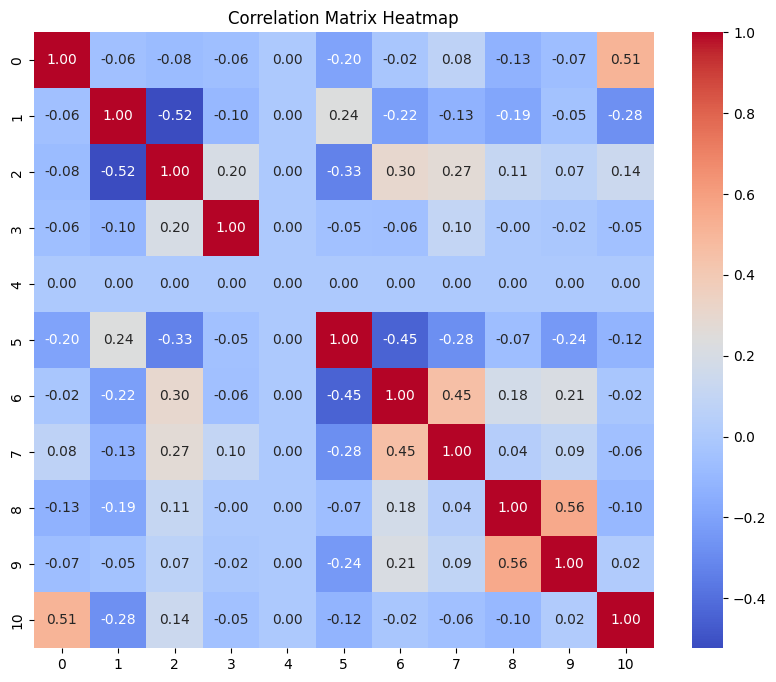

In [25]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [26]:
#chi-square test
# Assuming columns 3 and 4 are categorical variables
contingency_table = pd.crosstab(df[3], df[4])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("\nChi-Square Test:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)


Chi-Square Test:
Chi-square statistic: 0.0
P-value: 1.0


Eigenvalues: [1.58278149e+03 1.97409394e+02 5.58224787e+01 2.95210878e+01
 6.83514448e+00 3.44524182e-01 8.48820924e-02 4.95285993e-03
 1.88496214e-02 5.22458760e-02 0.00000000e+00]

Eigenvectors: [[ 9.99624834e-01 -2.14008687e-02  1.21318386e-02  7.07475793e-03
   9.34774617e-03 -1.29942938e-03  8.26015550e-04  5.79890762e-04
  -2.16808876e-03 -4.14589521e-04  0.00000000e+00]
 [-2.30043440e-02 -9.91081933e-01  5.59964904e-02  1.13517730e-01
   3.21915352e-02  1.82464781e-03  1.24282183e-02 -4.17486706e-04
   2.80675472e-03 -1.83933516e-03  0.00000000e+00]
 [-7.07223736e-04  1.40953927e-02  5.15362539e-03  1.30874800e-02
  -5.24404183e-03  9.55108484e-02  9.89723899e-01  5.41801095e-02
  -7.18248377e-02 -5.29666749e-02  0.00000000e+00]
 [-1.14857124e-02  7.18298429e-02  9.87834482e-01  1.36568371e-01
   6.49318728e-03 -1.23263447e-02 -6.65044686e-03  3.73180208e-04
   1.41099563e-03  4.58317013e-04  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.

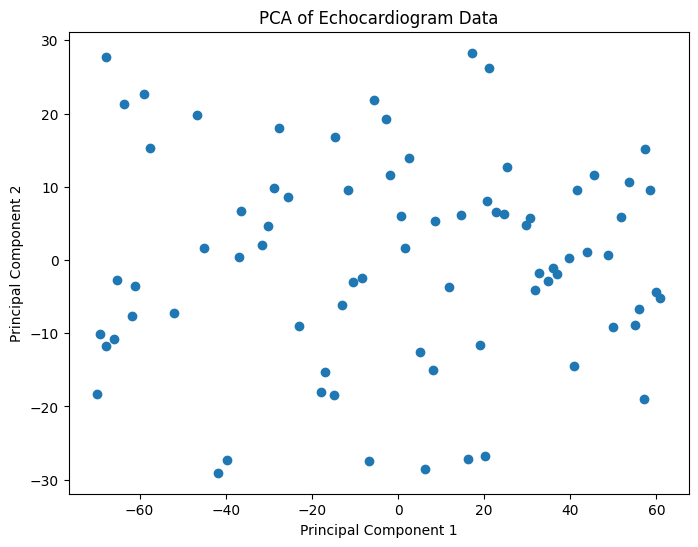

In [27]:
#PCA
# Eigenvalues and Eigenvectors
covariance_matrix = df.cov()
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("Eigenvalues:", eigenvalues)
print("\nEigenvectors:", eigenvectors)


# Assuming you want to reduce the dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Explained Variance Ratio
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Echocardiogram Data')
plt.show()

[1.78726480e-23 1.34090688e-21 4.96479366e-20 1.20937281e-18
 2.17997202e-17 3.10114994e-16 3.62595993e-15 3.58345784e-14
 3.05512752e-13 2.28220637e-12 1.51210801e-11 8.97395572e-11
 4.80911986e-10 2.34290455e-09 1.04357946e-08 4.27064826e-08
 1.61244348e-07 5.63747206e-07 1.83097383e-06 5.53986955e-06
 1.56536827e-05 4.13991168e-05 1.02677530e-04 2.39237500e-04
 5.24482211e-04 1.08339197e-03 2.11122538e-03 3.88561708e-03
 6.76068906e-03 1.11303298e-02 1.73518988e-02 2.56331607e-02
 3.59028565e-02 4.77030960e-02 6.01505102e-02 7.20043470e-02
 8.18510953e-02 8.83742249e-02 9.06402307e-02 8.83161222e-02
 8.17490259e-02 7.18818827e-02 6.00332207e-02 4.76113200e-02
 3.58472176e-02 2.56139093e-02 1.73614904e-02 1.11575754e-02
 6.79467731e-03 3.91822836e-03 2.13794614e-03 1.10283195e-03
 5.37277102e-04 2.46934324e-04 1.06934522e-04 4.35714555e-05
 1.66784509e-05 5.98713623e-06 2.01159308e-06 6.31190874e-07
 1.84501948e-07 5.01001506e-08 1.25975565e-08 2.92251005e-09
 6.22906789e-10 1.213869

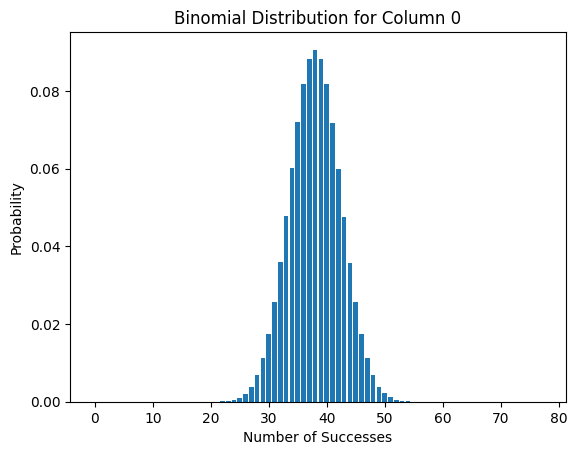

In [28]:
#Binomial distribution
median_val = df[0].median()
successes = (df[0] > median_val).astype(int)
n = len(successes)  # Number of trials
p = successes.mean()
k_values = np.arange(0, n + 1)
binomial_probs = stats.binom.pmf(k_values, n, p)
print(binomial_probs)
#plot the binomial distribution
plt.bar(k_values, binomial_probs)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution for Column 0')
plt.show()

[1.13261329e-12 3.11542201e-11 4.28471677e-10 3.92858447e-09
 2.70153958e-08 1.48619762e-07 6.81334752e-07 2.67730427e-06
 9.20540658e-06 2.81342729e-05 7.73875196e-05 1.93514482e-04
 4.43575404e-04 9.38554151e-04 1.84402383e-03 3.38150864e-03
 5.81334034e-03 9.40615343e-03 1.43739055e-02 2.08092493e-02
 2.86194741e-02 3.74867323e-02 4.68694799e-02 5.60528280e-02
 6.42423646e-02 7.06832874e-02 7.47788225e-02 7.61815999e-02
 7.48388815e-02 7.09846623e-02 6.50846385e-02 5.77500060e-02
 4.96406301e-02 4.13769597e-02 3.34745610e-02 2.63076513e-02
 2.01008677e-02]


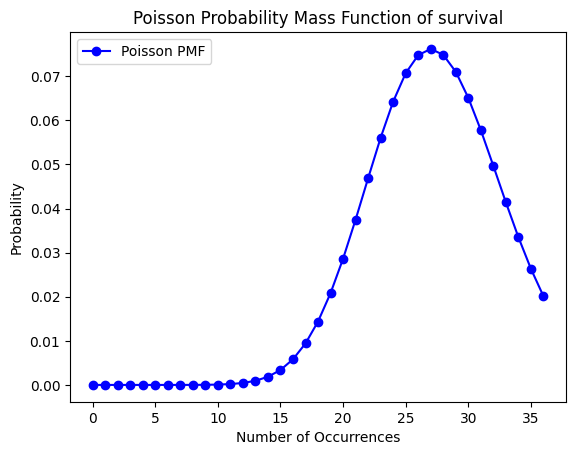

In [34]:
# Poisson PMF 
mean_value = df[1].mean()
x_values = np.arange(0, int(mean_value) + 10)
pmf_values = poisson.pmf(x_values, mean_value)
print(pmf_values)

plt.plot(x_values, pmf_values, 'bo-', label='Poisson PMF')
plt.title('Poisson Probability Mass Function of survival')
plt.xlabel('Number of Occurrences')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [35]:
#bernoulli distribution
df[0]=np.where(df[0] > 50, 1, 0)
p=df[0].mean()
bernoulli_pmf=stats.bernoulli.pmf(df[0],p)
print("Bernoulli distribution:")
print("probability of success:",p)
print("PMF:",bernoulli_pmf)

Bernoulli distribution:
probability of success: 0.6883116883116883
PMF: [0.31168831 0.31168831 0.31168831 0.31168831 0.31168831 0.31168831
 0.31168831 0.31168831 0.31168831 0.31168831 0.31168831 0.31168831
 0.31168831 0.31168831 0.31168831 0.31168831 0.31168831 0.31168831
 0.31168831 0.31168831 0.31168831 0.31168831 0.31168831 0.31168831
 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169
 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169
 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169
 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169
 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169
 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169
 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169
 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169
 0.68831169 0.68831169 0.68831169 0.68831169 0.68831169]


Bernoulli distribution: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


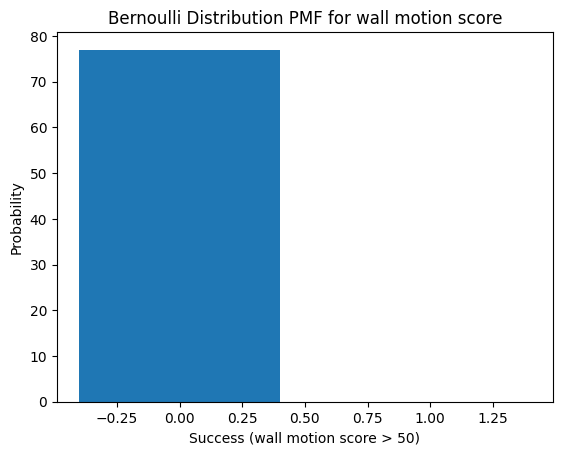

In [37]:
# Bernoulli distribution PMF 
df[8] = np.where(df[8] > 50, 1, 0)
p = df[8].mean()
bernoulli_pmf = stats.bernoulli.pmf(df[8], p)
print("Bernoulli distribution:",bernoulli_pmf)
plt.hist(df[8], bins=[0, 1, 2], align='left', rwidth=0.8)
plt.xlabel('Success (wall motion score > 50)')
plt.ylabel('Probability')
plt.title('Bernoulli Distribution PMF for wall motion score')
plt.show()

[1.13261329e-12 3.22868334e-11 4.60758510e-10 4.38934298e-09
 3.14047387e-08 1.80024500e-07 8.61359252e-07 3.53866353e-06
 1.27440701e-05 4.08783430e-05 1.18265863e-04 3.11780345e-04
 7.55355749e-04 1.69390990e-03 3.53793373e-03 6.91944237e-03
 1.27327827e-02 2.21389361e-02 3.65128416e-02 5.73220909e-02
 8.59415650e-02 1.23428297e-01 1.70297777e-01 2.26350605e-01
 2.90592970e-01 3.61276257e-01 4.36055080e-01 5.12236680e-01
 5.87075561e-01 6.58060223e-01 7.23144862e-01 7.80894868e-01
 8.30535498e-01 8.71912458e-01 9.05387019e-01 9.31694670e-01
 9.51795538e-01]


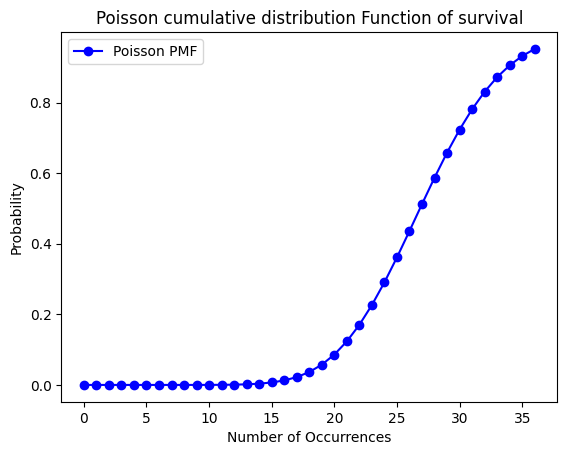

In [60]:
# Poisson PMF 
mean_value = df[1].mean()
x_values = np.arange(0, int(mean_value) + 10)
cdf_values = poisson.cdf(x_values, mean_value)
print(cdf_values)

plt.plot(x_values, cdf_values, 'bo-', label='Poisson PMF')
plt.title('Poisson cumulative distribution Function of survival')
plt.xlabel('Number of Occurrences')
plt.ylabel('Probability')
plt.legend()
plt.show()

Normal distribution:
Mean: 0.15584415584415584
Standard Deviation: 0.36508596914523056
Probabilities: [0.99757793 1.00904331 1.01985947 1.03000281 1.03945104 1.04818326
 1.05618003 1.06342346 1.06989726 1.0755868  1.08047918 1.08456328
 1.08782978 1.0902712  1.09188196 1.09265836 1.09259862 1.09170287
 1.08997317 1.0874135  1.0840297  1.07982952 1.07482253 1.06902012
 1.06243544 1.05508336 1.04698039 1.03814466 1.02859581 1.01835496
 1.00744458 0.99588846 0.98371159 0.97094007 0.95760106 0.94372261
 0.92933363 0.91446377 0.89914328 0.88340296 0.86727406 0.85078811
 0.83397689 0.81687232 0.7995063  0.78191069 0.76411719 0.7461572
 0.72806182 0.70986167 0.69158689 0.673267   0.65493086 0.6366066
 0.61832153 0.60010211 0.58197388 0.5639614  0.54608823 0.52837689
 0.51084877 0.4935242  0.47642232 0.45956114 0.4429575  0.42662702
 0.41058419 0.39484226 0.37941333 0.36430833 0.34953701 0.33510799
 0.32102877 0.30730574 0.29394424 0.28094854 0.26832192 0.25606669
 0.2441842  0.23267493 0.2215

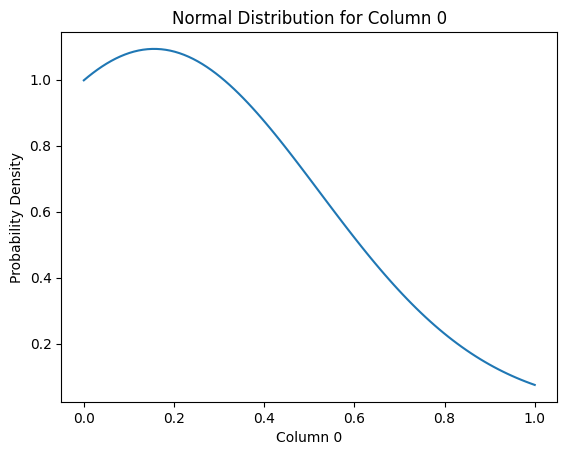

In [61]:
# Normal distribution
mean_val = df[2].mean()
std_val = df[2].std()
x_values = np.linspace(df[2].min(), df[2].max(), 100)
normal_probs = stats.norm.pdf(x_values, mean_val, std_val)
print("Normal distribution:")
print("Mean:", mean_val)
print("Standard Deviation:", std_val)
print("Probabilities:", normal_probs)
# Plot the normal distribution
plt.plot(x_values, normal_probs)
plt.xlabel('Column 0')
plt.ylabel('Probability Density')
plt.title('Normal Distribution for Column 0')
plt.show()

Normal distribution: [0.00426137 0.00461241 0.00498396 0.0053764  0.00578999 0.00622491
 0.00668125 0.00715899 0.00765799 0.00817801 0.00871866 0.00927942
 0.00985965 0.01045854 0.01107517 0.01170843 0.0123571  0.01301978
 0.01369493 0.01438089 0.01507581 0.01577775 0.01648461 0.01719418
 0.01790415 0.01861209 0.01931551 0.0200118  0.02069835 0.02137246
 0.02203142 0.02267253 0.02329307 0.02389036 0.02446178 0.02500476
 0.02551682 0.0259956  0.02643884 0.02684443 0.02721043 0.02753505
 0.0278167  0.028054   0.02824575 0.02839101 0.02848904 0.02853936
 0.0285417  0.02849606 0.02840266 0.02826198 0.02807472 0.02784182
 0.02756444 0.02724394 0.02688191 0.02648009 0.02604043 0.02556503
 0.02505611 0.02451603 0.02394728 0.0233524  0.02273401 0.02209479
 0.02143745 0.0207647  0.02007925 0.01938378 0.01868095 0.01797334
 0.01726346 0.01655374 0.01584651 0.015144   0.01444831 0.0137614
 0.01308511 0.01242115 0.01177105 0.01113623 0.01051793 0.00991726
 0.00933517 0.00877248 0.00822985 0.007707

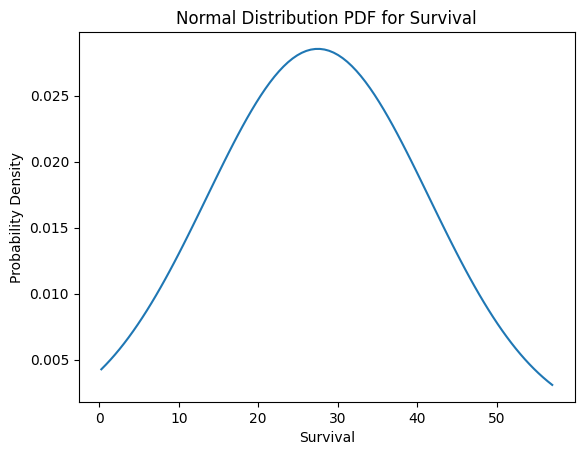

In [62]:
# Normal distribution PDF
mean_val = df[1].mean()
std_val = df[1].std()
x_values = np.linspace(df[1].min(), df[1].max(), 100)
normal_pdf = stats.norm.pdf(x_values, mean_val, std_val)
print("Normal distribution:",normal_pdf)

plt.plot(x_values, normal_pdf)
plt.xlabel('Survival')
plt.ylabel('Probability Density')
plt.title('Normal Distribution PDF for Survival')
plt.show()

In [63]:
# Mann-Whitney U test (also known as Wilcoxon rank-sum test)
from scipy.stats import mannwhitneyu
group1 = df[7]
group2 = df[9]
u_statistic, p_value = mannwhitneyu(group1, group2)
print("Mann-Whitney U statistic:", u_statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 5929.0
P-value: 5.3638049857672e-27


In [64]:
# Wilcoxon Signed-Rank Test
group1 = df[3]
group2 = df[4]
statistic, p_value = stats.wilcoxon(group1, group2)
print("Wilcoxon Signed-Rank Test:")
print("Statistic:", statistic)
print("P-value:", p_value)

Wilcoxon Signed-Rank Test:
Statistic: 0.0
P-value: 2.4138138319669312e-14


In [65]:
#spearmen test for this dataset
correlation, p_value = stats.spearmanr(df[2], df[3])

print("Spearman's rank correlation coefficient:", correlation)
print("P-value:", p_value)

Spearman's rank correlation coefficient: 0.2234303168470808
P-value: 0.05078472272106329


In [66]:
#to perform eigenvalue decomposition
numerical_df = df[[0, 1, 2]]
# Calculate the covariance matrix
covariance_matrix = numerical_df.cov()
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

Eigenvalues:
 [1.95342693e+02 2.20477690e-01 9.17117910e-02]

Eigenvectors:
 [[-3.10680036e-03  9.80389898e-01  1.97043131e-01]
 [ 9.99901507e-01  3.48718251e-04  1.40305044e-02]
 [-1.36866522e-02 -1.97067313e-01  9.80294420e-01]]


In [67]:
#kruskalwallis test
from scipy.stats import kruskal
group1 = df[2]
group2 = df[1]
group3 = df[7]
h_statistic, p_value = kruskal(group1, group2, group3)
print("Kruskal-Wallis H statistic:", h_statistic)
print("P-value:", p_value)

Kruskal-Wallis H statistic: 190.08663223564858
P-value: 5.287036008147128e-42


In [68]:
# MAD (Median Absolute Deviation) calculation for a numerical column (e.g., column 0)
median_val = df[5].median()
absolute_deviations = np.abs(df[5] - median_val)
mad_val = np.median(absolute_deviations)
print("Median Absolute Deviation (MAD) for column 0:", mad_val)

Median Absolute Deviation (MAD) for column 0: 0.067


In [69]:
#kendall's tau correlation
from scipy.stats import kendalltau
tau, p_value = kendalltau(df[10], df[9])
print("Kendall's Tau Correlation:", tau)
print("P-value:", p_value)

Kendall's Tau Correlation: 0.044364669451153055
P-value: 0.6569054519324753


Accuracy: 0.6875
Confusion Matrix:
 [[11  1]
 [ 4  0]]


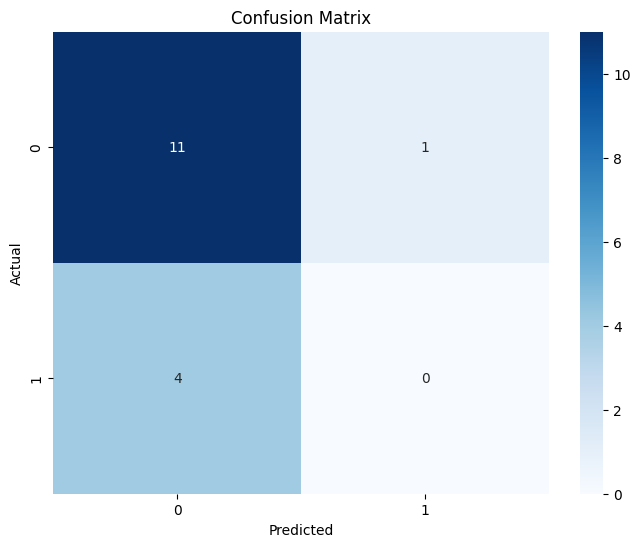

In [70]:
#classification
X=df[[7,8,3]]
y=df[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier=RandomForestClassifier(random_state=42)
classifier.fit(X_train,y_train)
y_pred =classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Mean Squared Error: 0.0


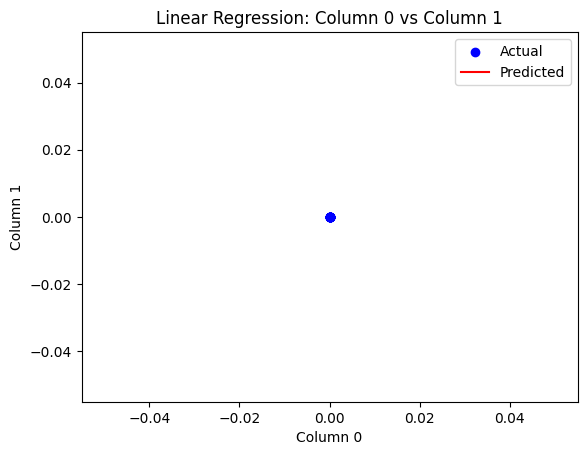

In [71]:
#regression 
X = df[[4]]  
y = df[8]    


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Column 0')
plt.ylabel('Column 1')
plt.title('Linear Regression: Column 0 vs Column 1')
plt.legend()
plt.show()

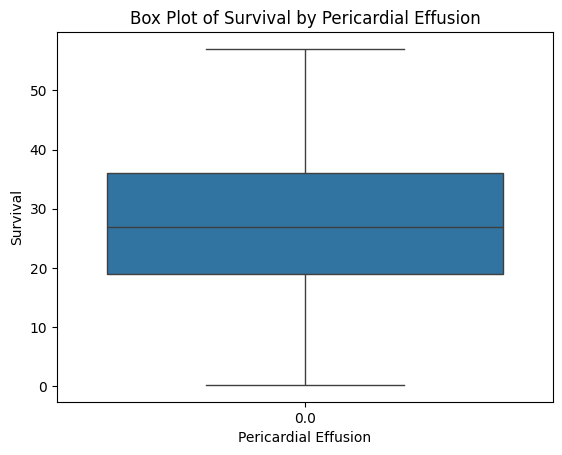

In [72]:
#Box Plot of Survival by Pericardial Effusion
sns.boxplot(x=df[4], y=df[1])
plt.xlabel("Pericardial Effusion")
plt.ylabel("Survival")
plt.title("Box Plot of Survival by Pericardial Effusion")
plt.show()

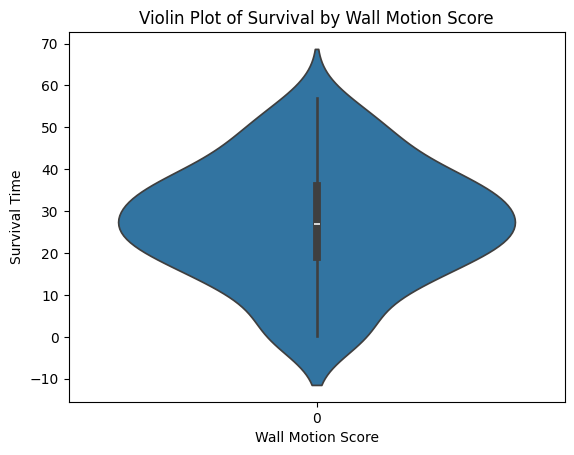

In [73]:
#Violin Plot of Survival by Wall Motion Score
sns.violinplot(x=df[8], y=df[1])
plt.xlabel("Wall Motion Score")
plt.ylabel("Survival Time")
plt.title("Violin Plot of Survival by Wall Motion Score")
plt.show()

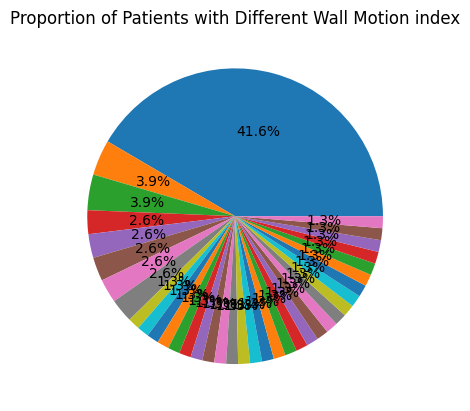

In [80]:
#Pie Chart of the Proportion of Patients with Different Wall Motion index
wall_motion_index = df[9].value_counts()
plt.pie(wall_motion_index,autopct='%1.1f%%')
plt.title("Proportion of Patients with Different Wall Motion index")
plt.show()

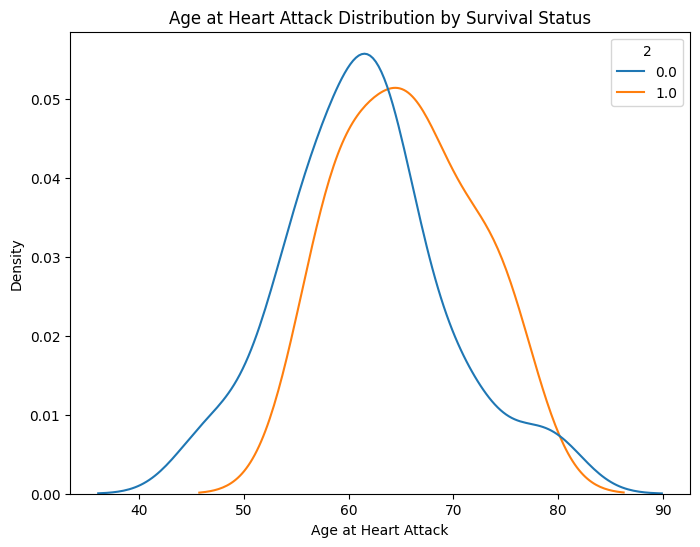

In [81]:
#kdeplot
#Age at Heart Attack Distribution by Survival Status
df[3] = pd.to_numeric(df[3], errors='coerce')
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x=df[3], hue=df[2], common_norm=False)
plt.title('Age at Heart Attack Distribution by Survival Status')
plt.xlabel('Age at Heart Attack')
plt.ylabel('Density')
plt.show()

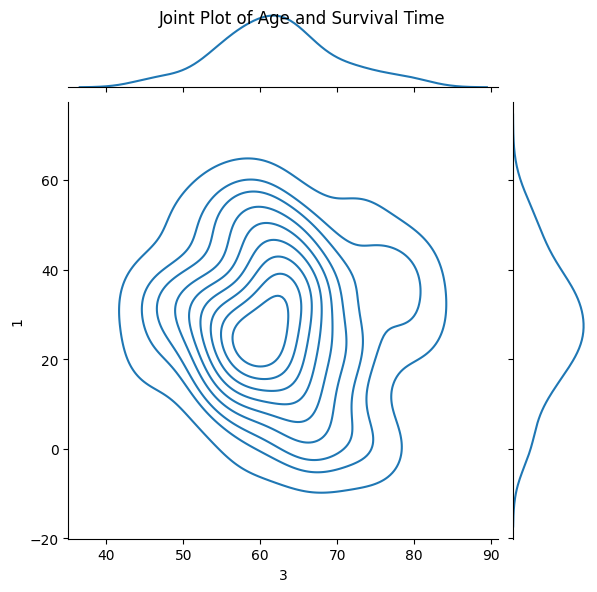

In [82]:
#Joint Plot of Age and Survival Time
sns.jointplot(x=df[3], y=df[1], kind="kde")
plt.suptitle("Joint Plot of Age and Survival Time")
plt.show()

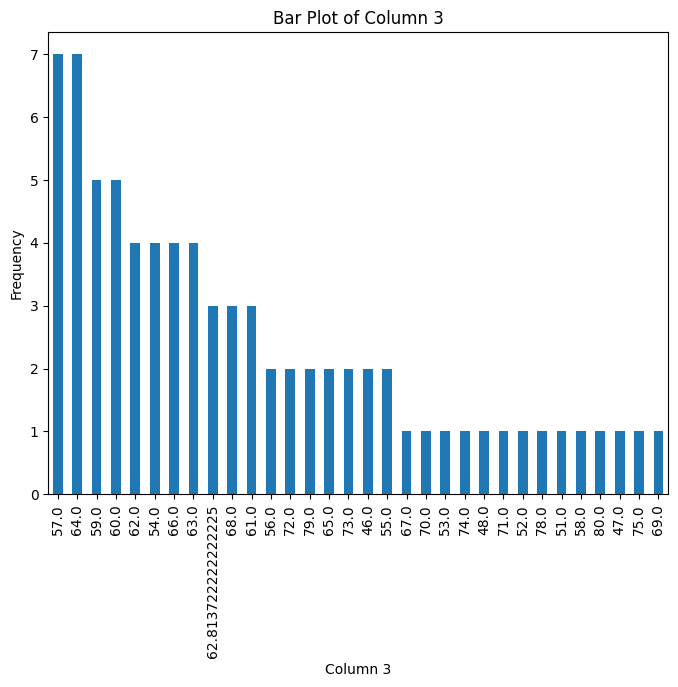

In [83]:
# Bar plot
plt.figure(figsize=(8, 6))
df[3].value_counts().plot(kind='bar')
plt.xlabel('Column 3')
plt.ylabel('Frequency')
plt.title('Bar Plot of Column 3')
plt.show()

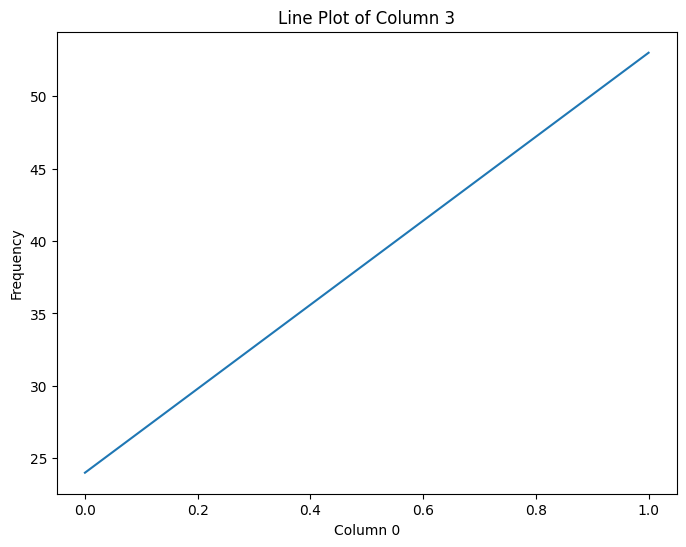

In [95]:
# Bar plot
plt.figure(figsize=(8, 6))
df[0].value_counts().plot(kind='line')
plt.xlabel('Column 0')
plt.ylabel('Frequency')
plt.title('Line Plot of Column 3')
plt.show()

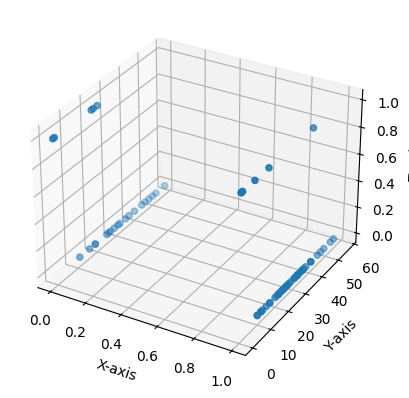

In [97]:
# 3d plot
x_column = 0
y_column = 1
z_column = 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.show()

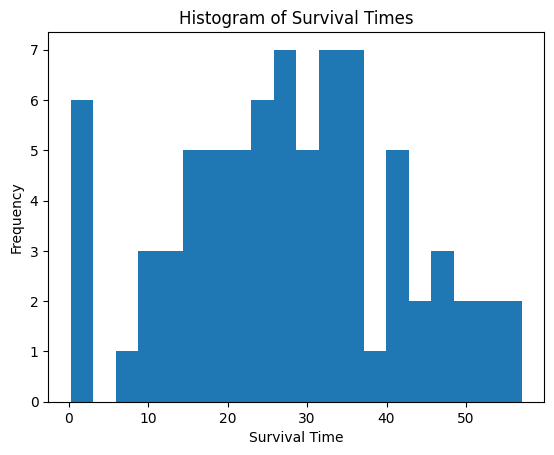

In [84]:
#Histogram of Survival Times
plt.hist(df[1], bins=20)
plt.xlabel("Survival Time")
plt.ylabel("Frequency")
plt.title("Histogram of Survival Times")
plt.show()

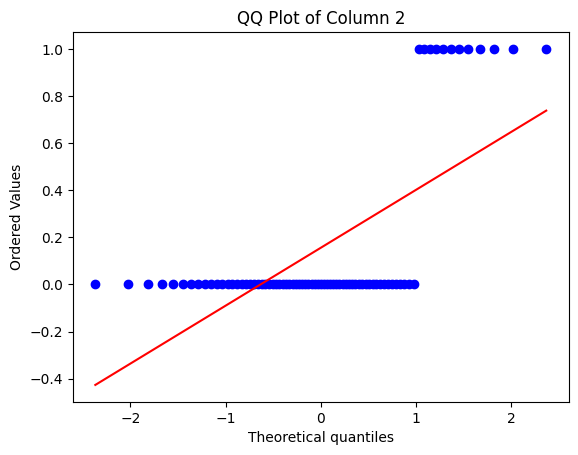

In [85]:
#Probability Plot (QQ Plot)
stats.probplot(df[2], dist='norm', plot=plt)
plt.title('QQ Plot of Column 2')
plt.show()

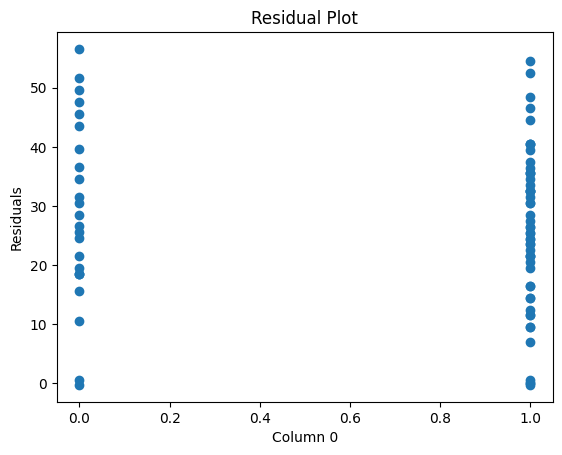

In [86]:
#Residual plot
residuals = df[1] - (slope * df[0] + intercept)
plt.scatter(df[0], residuals)
plt.xlabel('Column 0')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

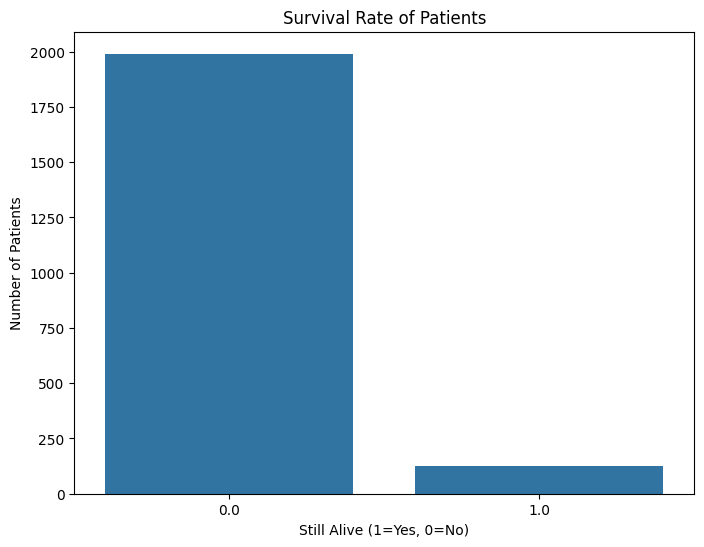

In [87]:
# Survival Rate Analysis using countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=df[2],data=df)
plt.title('Survival Rate of Patients')
plt.xlabel('Still Alive (1=Yes, 0=No)')
plt.ylabel('Number of Patients')
plt.show()

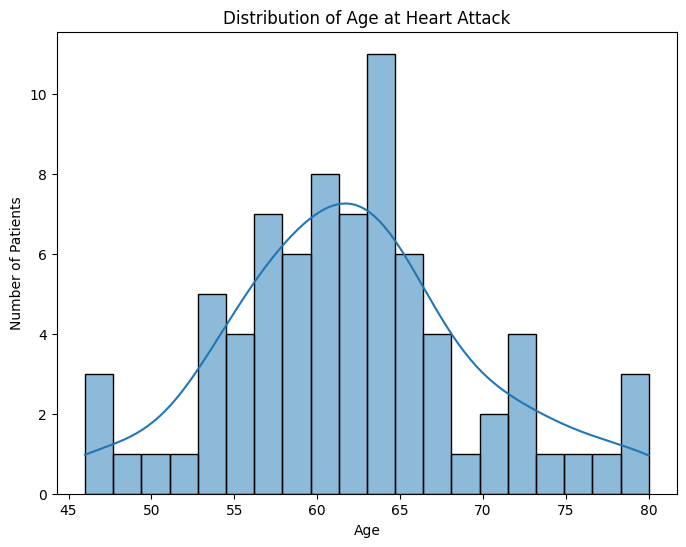

In [88]:
#Age at Heart Attack Distribution using histplot
plt.figure(figsize=(8, 6))
sns.histplot(df[3], bins=20, kde=True)
plt.title('Distribution of Age at Heart Attack')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

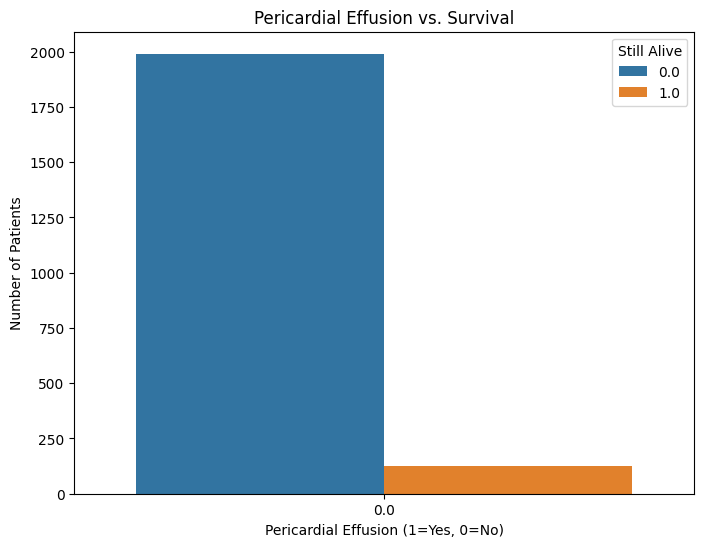

In [89]:
#Pericardial Effusion vs. Survival using countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=df[4], hue=df[2], data=df)
plt.title('Pericardial Effusion vs. Survival')
plt.xlabel('Pericardial Effusion (1=Yes, 0=No)')
plt.ylabel('Number of Patients')
plt.legend(title='Still Alive')
plt.show()

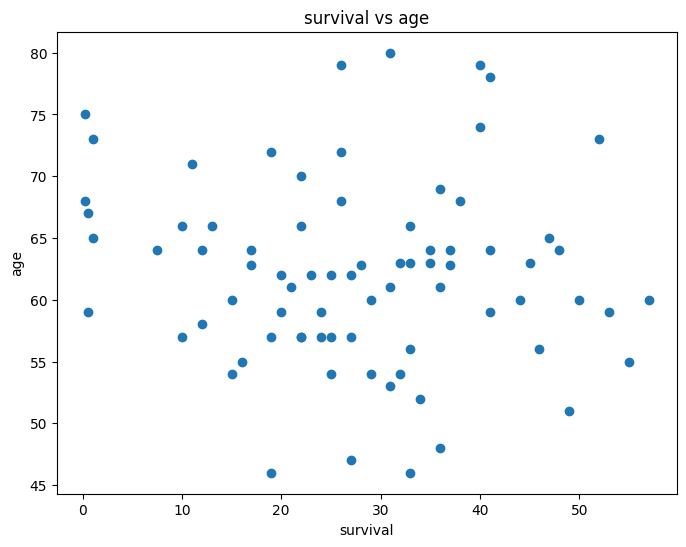

In [90]:
#Scatter Plot of Age vs. survival
plt.figure(figsize=(8, 6))
plt.scatter(df[1], df[3])
plt.xlabel('survival')
plt.ylabel('age')
plt.title('survival vs age')
plt.show()

In [91]:
#Summary
print(df.describe())

              0          1          2          3     4          5     6   \
count  77.000000  77.000000  77.000000  77.000000  77.0  77.000000  77.0   
mean    0.688312  27.506494   0.155844  62.109626   0.0   0.218746   0.0   
std     0.466221  13.975129   0.365086   7.500054   0.0   0.086887   0.0   
min     0.000000   0.250000   0.000000  46.000000   0.0   0.030000   0.0   
25%     0.000000  19.000000   0.000000  57.000000   0.0   0.150000   0.0   
50%     1.000000  27.000000   0.000000  62.000000   0.0   0.217000   0.0   
75%     1.000000  36.000000   0.000000  66.000000   0.0   0.280000   0.0   
max     1.000000  57.000000   1.000000  80.000000   0.0   0.410000   0.0   

              7     8          9          10  
count  77.000000  77.0  77.000000  77.000000  
mean    4.637162   0.0   1.199870   0.175584  
std     0.668315   0.0   0.277086   0.174455  
min     3.100000   0.0   1.000000   0.000000  
25%     4.270000   0.0   1.000000   0.000000  
50%     4.560000   0.0   1.080000